In [6]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


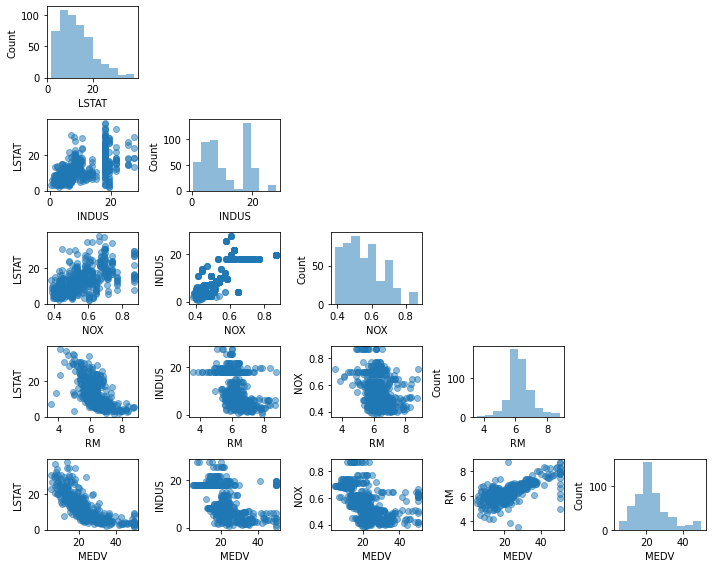

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

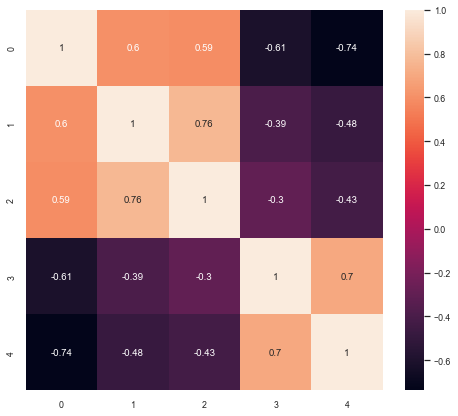

In [9]:
import seaborn as sns
import numpy as np
cm = np.corrcoef(df[cols].values.T)
# hm = sns.heatmap(cm)
plt.figure(figsize = (8, 7))
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True,fmt='.2g')
plt.show()

In [10]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])

Slope: 9.102


In [11]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: -34.671


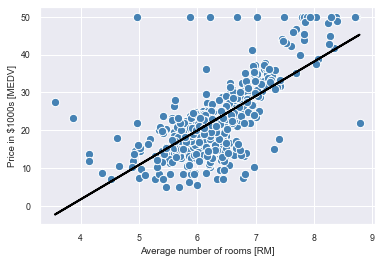

In [16]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolors='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None

lin_regplot(X,y,slr)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV]")
plt.show()

In [17]:
#Split the dataset
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['MEDV'].values
X_train, X_test,y_train, y_test=train_test_split(X,y,
test_size=0.3,random_state=0)
slr=LinearRegression()
slr.fit(X_train, y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: .3f' % )

In [18]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',residual_threshold=5.0,random_state=0)
ransac.fit(X,y)

C:\Users\Gelli Satyanarayana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:, np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,391.2,390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)  

In [ ]:
lr.fit(X,y)
X_fit = np.arange(250,600,)
y_lin_fit = lr.predict(X_fit)
pr.fit(X_quad ,y)
y